# Assignment 3

In [12]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [11]:
import numpy as np # For working with multidimensional array and matrix data structures.
import matplotlib.pyplot as plt # Used for ploting graphs.

# Do it yourself

You will be asked to implement K-means and GMM yourself in this section.

## Generate Random Data

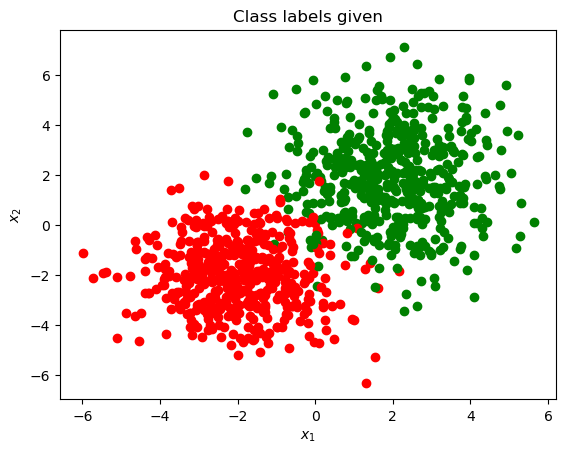

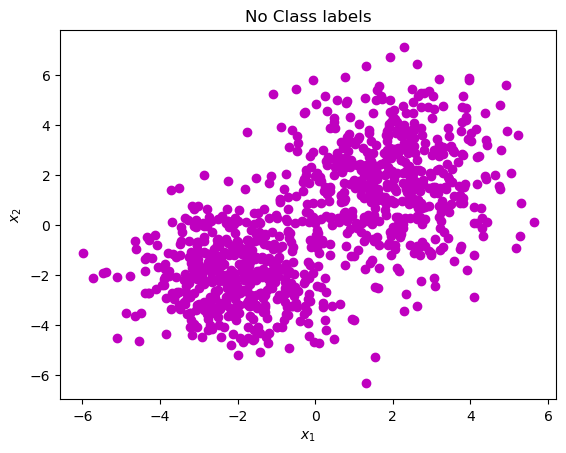

In [3]:
# Training data - two randomly-generated Gaussian-distributed clouds of points in 2d space
np.random.seed(0)
# Number of points
N = 1000
# Labels for each cluster
y = np.random.randint(low=0, high=2, size = N)
c = np.array(["r","g"])
# Mean of each cluster
means = np.array([[-2, 2], [-2, 2],])
# Covariance (in X and Y direction) of each cluster
covariances = np.random.random_sample((2, 2)) + 1
# Dimensions of each point
X = np.vstack([np.random.randn(N)*covariances[0, y] + means[0, y],
               np.random.randn(N)*covariances[1, y] + means[1, y]])


for k in range(X.shape[1]):
    plt.plot(X[0,k],X[1,k],c[y[k]]+"o")
    
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Class labels given")
plt.show()

for k in range(X.shape[1]):
    plt.plot(X[0,k],X[1,k],"m"+"o")
    
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("No Class labels")
plt.show()

# Plot the data

## K-means

**Please write a generic python function (in a separate package) which implements a generic version of the K-means algorithm. Your function should take as input a $d$-dimensional data set and the number of clusters into which you wish to group your data set. Return the means of your K-clusters and the assigned labels of your dataset (use 1-of-K coding to represent your labels). Initialize your means with two random samples.**

(2, 2)
[[-0.71075087  0.34197264]
 [ 0.72041937 -0.36416865]]
(1000,)


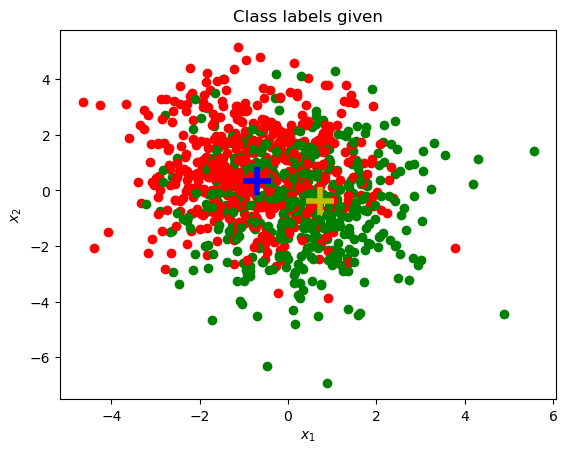

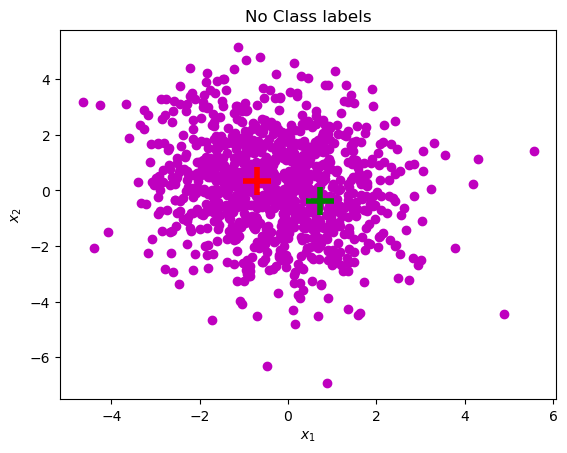

In [4]:
def k_means(data, k, max_iter=100):
    # Initialize means with two random samples
    start_indices = np.random.choice(len(data), k, replace=False)
    means = data[start_indices]
    
    # Initialize labels
    labels = np.zeros(len(data), dtype=int)
    
    # Perform iterations of K-means
    for counter in range(max_iter):
        # Calculate distances to cluster centers
        distances = np.linalg.norm(data[:, None, :] - means, axis=2)
        
        # Assign a label to each observation based on the closest cluster center
        labels = np.argmin(distances, axis=1)
        
        # Update means
        new_means = np.array([data[labels == j].mean(axis=0) for j in range(k)])
        
        # Check for convergence
        if np.allclose(means, new_means):
            break
        
        means = new_means
    
    return means, labels

# Example usage
np.random.seed(0)
k = 2  # Number of clusters
# print(X.shape)
X_data = np.random.randn(2, 1000)
means_mine, labels_mine = k_means(X_data.T, k)
print(means_mine.shape)
print(means_mine)
print(labels_mine.shape)
# print("Cluster Means:")
# print(means_mine)

# print("Assigned Labels (1-of-K coding):")
# print(np.eye(k)[labels_mine])  # 1-of-K coding for labels
Xm = np.vstack([np.random.randn(N)*covariances[0, labels_mine] + means_mine[0, labels_mine],
               np.random.randn(N)*covariances[1, labels_mine] + means_mine[1, labels_mine]])

for k in range(Xm.shape[1]):
    plt.plot(Xm[0,k],Xm[1,k],c[labels_mine[k]]+"o")


#red = blue
#green = yellow
plt.plot(means_mine[0,0],means_mine[0,1],'b'+'+', markersize=20,markeredgewidth=4)
plt.plot(means_mine[1,0],means_mine[1,1],'y'+'+', markersize=20,markeredgewidth=4)

plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Class labels given")
plt.show()

for k in range(Xm.shape[1]):
    plt.plot(Xm[0,k],Xm[1,k],"m"+"o")

#red = magenta
#green = black
plt.plot(means_mine[0,0],means_mine[0,1],'r'+'+', markersize=20,markeredgewidth=4)
plt.plot(means_mine[1,0],means_mine[1,1],'g'+'+', markersize=20,markeredgewidth=4)

plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("No Class labels")
plt.show()

Cluster Means:
[[ 0.66585019 -0.38491519]
 [-0.72303047  0.39346788]]


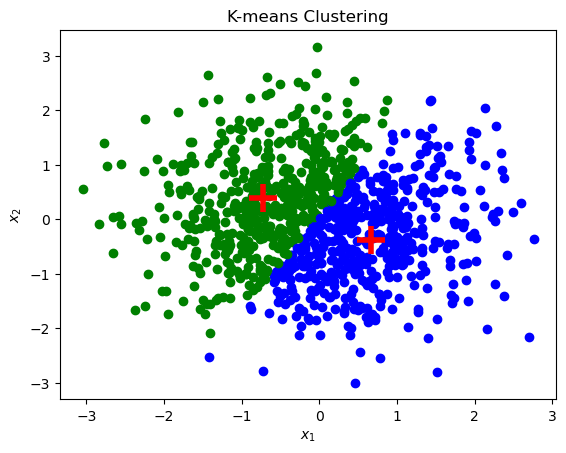

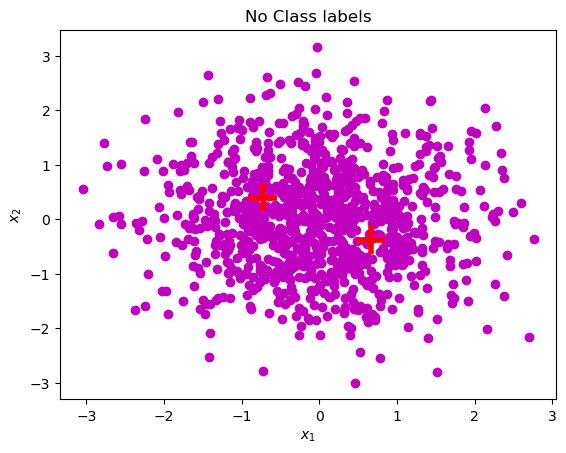

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def k_means(data, k, max_iter=100):
    # K-means++ initialization
    means = [data[np.random.randint(len(data))]]
    for _ in range(1, k):
        distances = np.array([min(np.linalg.norm(m - x) for m in means) for x in data])
        prob = distances / distances.sum()
        cumulative_prob = np.cumsum(prob)
        r = np.random.rand()
        for i, cp in enumerate(cumulative_prob):
            if r < cp:
                means.append(data[i])
                break
    
    means = np.array(means)
    
    # Initialize labels
    labels = np.zeros(len(data), dtype=int)
    
    # Perform iterations of K-means
    for counter in range(max_iter):
        # Calculate distances to cluster centers
        distances = np.linalg.norm(data[:, None, :] - means, axis=2)
        
        # Assign a label to each observation based on the closest cluster center
        labels = np.argmin(distances, axis=1)
        
        # Update means
        new_means = np.array([data[labels == j].mean(axis=0) for j in range(k)])
        
        # Check for convergence
        if np.allclose(means, new_means):
            break
        
        means = new_means
    
    return means, labels

# Example usage
np.random.seed(0)
k = 2  # Number of clusters
X_data = np.random.randn(2, 1000)
means_mine, labels_mine = k_means(X_data.T, k)
print("Cluster Means:")
print(means_mine)

# Plotting the clusters
for k in range(X_data.shape[1]):
    plt.plot(X_data[0, k], X_data[1, k], 'o', c='blue' if labels_mine[k] == 0 else 'green')

plt.plot(means_mine[:, 0], means_mine[:, 1], 'r+', markersize=20, markeredgewidth=4)

plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("K-means Clustering")
plt.show()




for k in range(X_data.shape[1]):
    plt.plot(X_data[0,k],X_data[1,k],"m"+"o")

plt.plot(means_mine[:, 0], means_mine[:, 1], 'r+', markersize=20, markeredgewidth=4)

plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("No Class labels")
plt.show()


In [6]:
from IPython.display import HTML
from IPython.display import display
from IPython.display import Image

**Use your newly created function to assign labels to the random dataset we generated above. Plot the data and their newly assigned labels. Also plot the mean of the two clusters. Your generated plot should resemble the following:**

Cluster Means:
[[ 2.0212828   1.99647112]
 [-1.94876553 -1.9852701 ]]


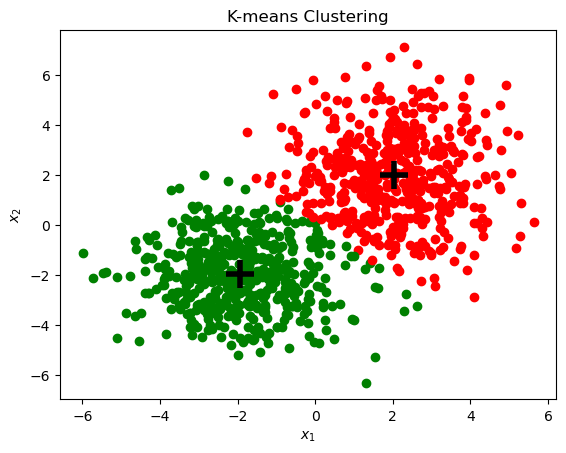

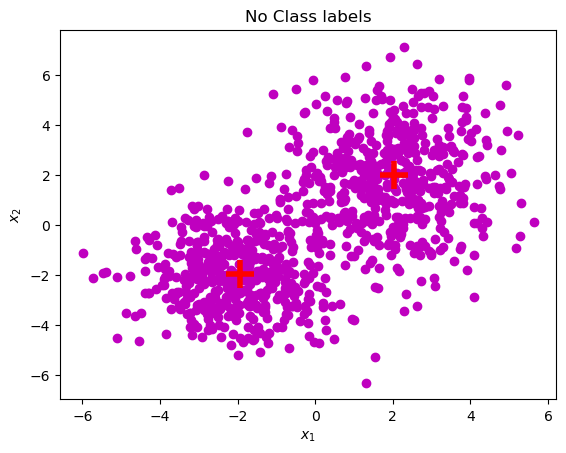

In [7]:
#using my own stuff
means_mine, labels_mine = k_means(X.T, 2)
print("Cluster Means:")
print(means_mine)

# Plotting the clusters
for k in range(X.shape[1]):
    plt.plot(X[0, k], X[1, k], 'o', c='red' if labels_mine[k] == 0 else 'green')

plt.plot(means_mine[:, 0], means_mine[:, 1], 'k+', markersize=20, markeredgewidth=4)

plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("K-means Clustering")
plt.show()

for k in range(X.shape[1]):
    plt.plot(X[0,k],X[1,k],"m"+"o")

plt.plot(means_mine[:, 0], means_mine[:, 1], 'r+', markersize=20, markeredgewidth=4)

plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("No Class labels")
plt.show()

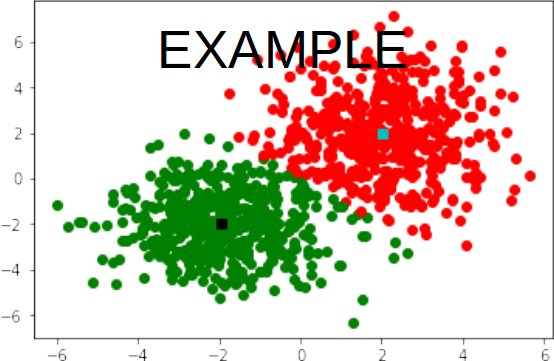

In [8]:
display(Image(filename='./kmeans.jpg'))

$x_1$ is on the $x$-axis and $x_2$ is on the $y$-axis.

# Perform K-means on an image

In [9]:
from skimage import io  # for loading an image from a file.
import seaborn as sns; sns.set()  # for plot styling
from sklearn.datasets import load_sample_image # imports available image from sklean dataset

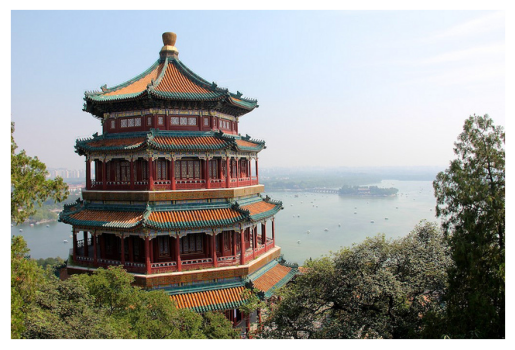

In [10]:
china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);

In [11]:
# Reshape the image


In [12]:
data = china / 255.0 # use 0...1 scale
#print(data.shape) # (427, 640, 3)
data = data.reshape(427 * 640, 3) # china

#equivalent to 
# img_data = (china/255.0).reshape(-1,3)
# print(img_data.shape) (273280, 3)

data.shape

#Performing KMeans on the image 



(273280, 3)

# Visualise possible colors from the image, using a k-means clustering across the pixel space


In [13]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

 The  MiniBatchKmeans is a variant of the KMeans algorithm which uses mini-batches to reduce the computation time, 
instead of using the full dataset at each iteration while still attempting to optimize the same objective function. 
 Mini-batches are subsets of the input data, randomly sampled in each training iteration. 
This increases the speed of the algorithm by a factor of 3–4 typically. Especially important, it makes it possible to cluster huge datasets that do not fit in memory.

Color Quantization is the process of reducing the number of colors in an image while keeping the visual appearance of the image intact. 
This is a useful image compression technique that is quite useful for devices that can show a limited number of colors due to memory restriction.

/home/konanani/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


(273280, 3)


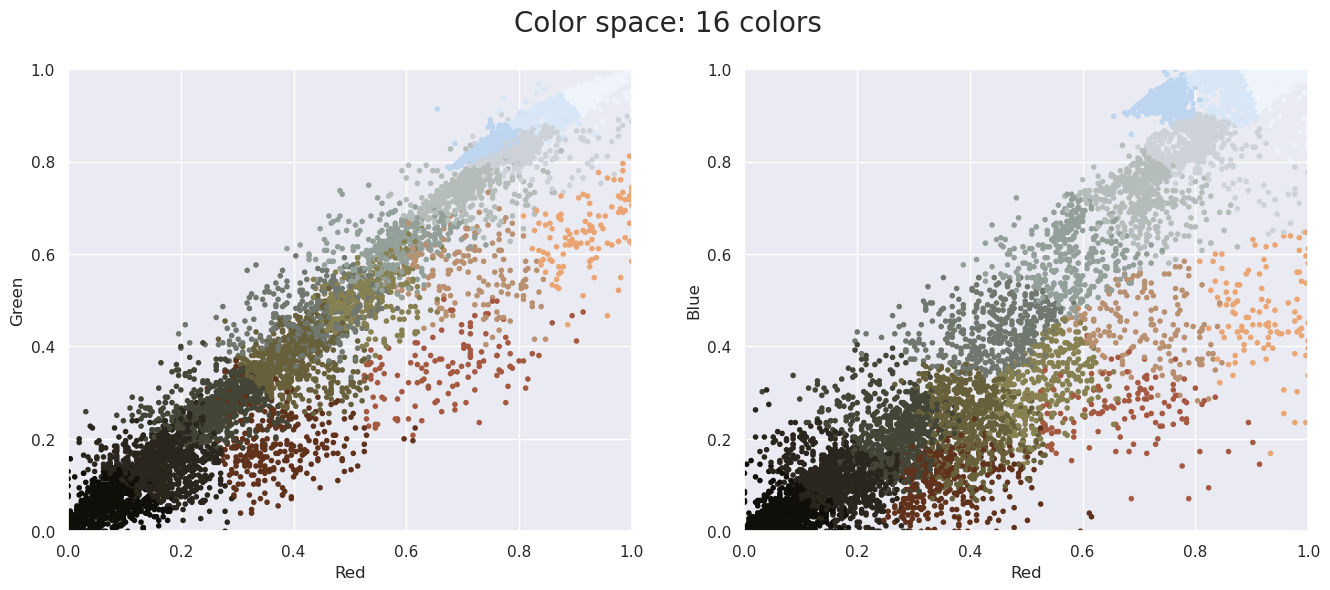

In [14]:
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]
print(new_colors.shape)
plot_pixels(data, colors=new_colors,
            title="Color space: 16 colors")

#reshaping the image again
# k_img = np.reshape(new_colors,(china.shape))
# print(k_img.shape) #(427, 640, 3)

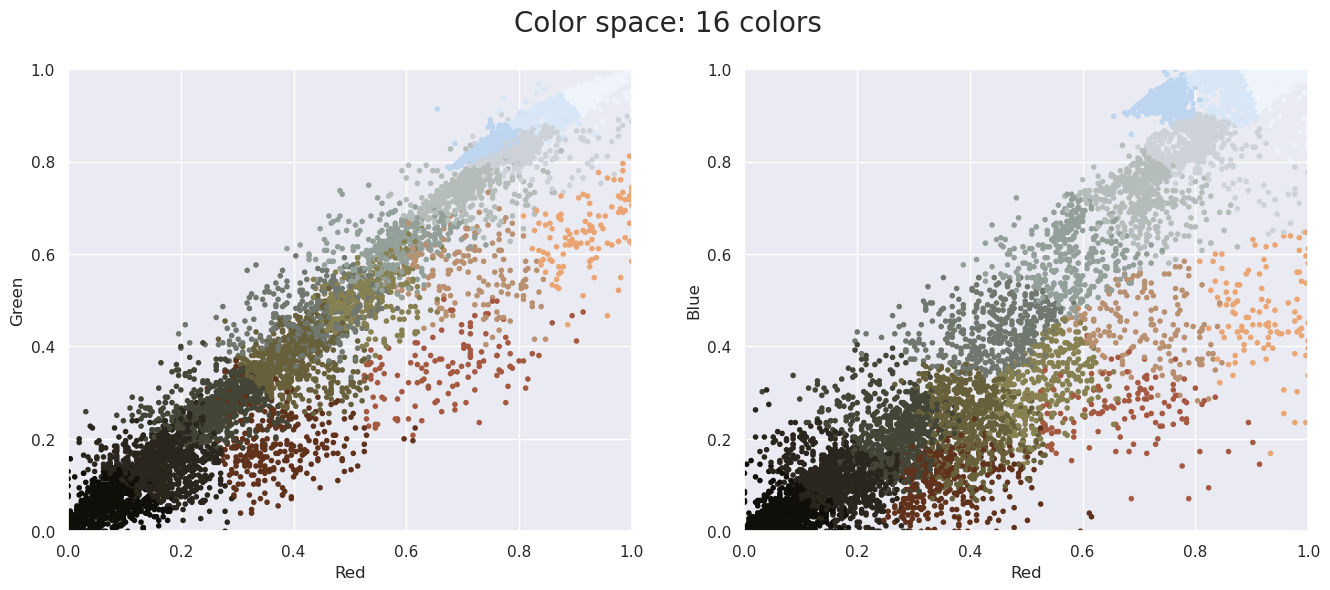

In [15]:
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,
            title="Color space: 16 colors")

In [16]:
from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider # for interactive slider

**Please create a widget function using the ipywidgets library of python that is already imported above and appy it to the image (china) above. Your function should take input K (the number of clusters) range slider. Hint: Read the documentation on ipywidgets. Reproducing the image using only 3 colors gives something like the following image.** 

**How many clusters do you need for a perfect reproduction?**

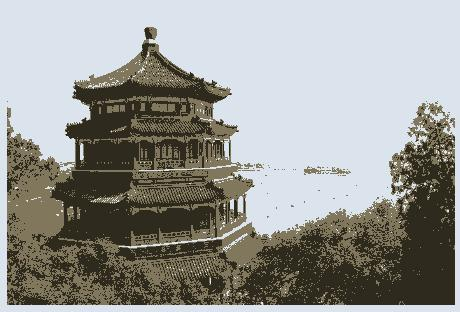

In [17]:
display(Image(filename='./Compressed.jpg'))

## GMM

**Please write a generic python function (in a separate package) which implements a generic version of the Gaussian Mixture Models algorithm. Your function should take as input a $d$-dimensional data set and the number of clusters into which you wish to group your data set. Return the number of members, the means and covariances of your K-clusters. Also return the responsibilites of your observations (of every sample in your dataset). Use your K-means function to intialize your GMM.**

In [18]:
def eval_2d_gauss(x,y,u_x,u_y,s_x,s_y):
    answ = 1.0/(2*np.pi*s_x*s_y)*np.exp(-0.5*(((x-u_x)/s_x)**2+((y-u_y)/s_y)**2))
    return answ

def gamma(x,p,u,s):
    #x[sample,x or y]
    #u[density num,x or y]
    #u[density num,x or y]
    gamma_var = np.zeros(x.shape,dtype=float)
    #gamma[sample,density]
    #p[density]
    
    for k in range(x.shape[0]):
        d0 = eval_2d_gauss(x[k,0],x[k,1],u[0,0],u[0,1],s[0,0],s[0,1])
        d1 = eval_2d_gauss(x[k,0],x[k,1],u[1,0],u[1,1],s[1,0],s[1,1])
        
        gamma_var[k,0] = (p[0]*d0)/(p[0]*d0 + p[1]*d1)
        gamma_var[k,1] = (p[1]*d1)/(p[0]*d0 + p[1]*d1)
        
    return gamma_var

def mean(x,gamma_var):
    N0 = np.sum(gamma_var[:,0])
    N1 = np.sum(gamma_var[:,1])
    
    u = np.zeros((2,2),dtype=float) #u[density num,x or y]
    p = np.zeros((2,),dtype=float) #p[density num]
    
    u[0,0] = (1.0/N0) * np.sum(gamma_var[:,0]*x[:,0])
    u[0,1] = (1.0/N0) * np.sum(gamma_var[:,0]*x[:,1])
    
    u[1,0] = (1.0/N1) * np.sum(gamma_var[:,1]*x[:,0])
    u[1,1] = (1.0/N1) * np.sum(gamma_var[:,1]*x[:,1])
    
    p[0] = N0/x.shape[0]
    p[1] = N1/x.shape[0]
   
    return u,p
    
def sigma(x,gamma_var,u):
    N0 = np.sum(gamma_var[:,0])
    N1 = np.sum(gamma_var[:,1])
        
    s = np.zeros((2,2),dtype=float) #s[density num,x or y]
    
    s[0,0] = np.sqrt((1.0/N0) * np.sum(gamma_var[:,0]*(x[:,0]-u[0,0])**2))
    s[0,1] = np.sqrt((1.0/N0) * np.sum(gamma_var[:,0]*(x[:,1]-u[0,1])**2))
    
    s[1,0] = np.sqrt((1.0/N1) * np.sum(gamma_var[:,1]*(x[:,0]-u[1,0])**2))
    s[1,1] = np.sqrt((1.0/N1) * np.sum(gamma_var[:,1]*(x[:,1]-u[1,1])**2))
    
    return s

In [35]:

def gamma_gmm(x, p, u, s):
    gamma_var = np.zeros((len(x), len(p)), dtype=float)
    
    for k in range(len(x)):
        for j in range(len(p)):
            gamma_var[k, j] = p[j] * eval_gaussian(x[k], u[j], s[j])
        gamma_var[k] /= np.sum(gamma_var[k])
    
    return gamma_var

def eval_gaussian(x, u, s):
    # Compute the Gaussian probability density function
    exponent = -0.5 * np.sum(((x - u) / s) ** 2)
    gaussian = (1.0 / (np.sqrt(2 * np.pi) * s)) * np.exp(exponent)
    return gaussian


# def mean_gmm(x, gamma_var):
#     print("gamma_var shape",gamma_var.shape)
#     print("x shape",x.shape)
#     N_k = np.sum(gamma_var, axis=1)
#     #N_knew = np.sum(gamma_var, axis=1)
#     print("N_k shape",N_k.shape)
#     u = np.dot(gamma_var, x)/N_k[:, None]
#     p = N_k/len(x)
#     return u, p
def mean_gmm(x, gamma_var):
    N_k = np.sum(gamma_var, axis=0)
    u = np.dot(gamma_var.T, x.T).T / N_k[:, None]
    p = N_k / len(x)
    return u, p



def covariance_gmm(x, gamma_var, u):
    print(x.shape)
    print(gamma_var.shape)
    print(u.shape)
    N_k = np.sum(gamma_var, axis=0)
    s = np.zeros((len(u), x.shape[1]))  # Initialize covariance matrices

    print(u.shape)
    for j in range(len(u)):
        diff = x - u[j]
        s[j] = np.dot((gamma_var[:, j] * diff), diff)/N_k[j]

    return s

def gmm(x, k, max_iter=100):
    # Initialize parameters using K-means
    means, labels = k_means(x.T, k)
    p = np.bincount(labels)/len(x)
    u, _ = mean_gmm(x, np.eye(k)[labels])
    s = covariance_gmm(x, np.eye(k)[labels], u)
    
    for _ in range(max_iter):
        print(x.shape)
        print(p.shape)
        print(u.shape)
        print(s.shape)
        gamma_var = gamma_gmm(x, p, u, s)
        u, p = mean_gmm(x, gamma_var)
        s = covariance_gmm(x, gamma_var, u)
    
    return len(x), u, s, gamma_var

# Example usage
np.random.seed(0)
k = 2  # Number of clusters
x_data = np.random.randn(2, 1000)  # Reshape to have 2 dimensions
members, means_gmm, covariances_gmm, responsibilities = gmm(x_data, k)  # Transpose to match the function's input shape
print("Number of members per cluster:", members)
print("Cluster Means:")
print(means_gmm)
print("Cluster Covariances:")
print(covariances_gmm)
print("Responsibilities of observations:")
print(responsibilities)


(2, 1000)
(1000, 2)
(2, 2)
(2, 2)


ValueError: operands could not be broadcast together with shapes (2,1000) (2,) 

In [38]:
import numpy as np

def eval_gaussian(x, u, s):
    return 1.0 / (np.sqrt(2 * np.pi) * s) * np.exp(-(x - u)**2 / (2 * s**2))

def gamma_gmm(x, p, u, s):
    gamma_var = np.zeros((len(x), len(p)), dtype=float)
    for k in range(len(x)):
        for j in range(len(p)):
            gamma_var[k, j] = p[j] * eval_gaussian(x[k], u[j], s[j])
        gamma_var[k] /= np.sum(gamma_var[k])
    return gamma_var


def mean_gmm(x, gamma_var):
    N_k = np.sum(gamma_var, axis=0)
    u = np.dot(gamma_var.T, x.T).T / N_k[:, None]
    p = N_k / len(x)
    return u, p


# def covariance_gmm(x, gamma_var, u):
#     N_k = np.sum(gamma_var, axis=0)
#     s = np.zeros((len(u), len(u[0])), dtype=float)
#     for j in range(len(u)):
#         diff = x - u[j][None, :]  # Reshape u[j] to match the shape of x
#         s[j] = np.sqrt(np.dot(gamma_var[:, j] * diff.T, diff) / N_k[j])
#     return s

def covariance_gmm(x, gamma_var, u):
    N_k = np.sum(gamma_var, axis=0)
    s = np.zeros((len(u), x.shape[1]), dtype=float)  # Adjust the shape of s
    for j in range(len(u)):
        diff = x - u[j]  # Remove the reshaping
        s[j] = np.sqrt(np.dot(gamma_var[:, j] * diff.T, diff) / N_k[j])
    return s


def gmm(x, k, max_iter=100):
    # Initialize parameters using K-means
    means, labels = k_means(x.T, k)
    p = np.bincount(labels) / len(x)
    u, _ = mean_gmm(x, np.eye(k)[labels])
    s = covariance_gmm(x, np.eye(k)[labels], u)
    
    for _ in range(max_iter):
        gamma_var = gamma_gmm(x, p, u, s)
        u, p = mean_gmm(x, gamma_var)
        s = covariance_gmm(x, gamma_var, u)
    
    return len(x), u, s, gamma_var

# Example usage
np.random.seed(0)
k = 2  # Number of clusters
x_data = np.random.randn(2, 1000)
members, means_gmm, covariances_gmm, responsibilities = gmm(x_data, k)
print("Number of members per cluster:", members)
print("Cluster Means:")
print(means_gmm)
print("Cluster Covariances:")
print(covariances_gmm)
print("Responsibilities of observations:")
print(responsibilities)


ValueError: operands could not be broadcast together with shapes (2,1000) (2,) 

**Use your newly created function to cluster the generated data set at the start of the K-Means section. Plot the 95% confidence
interval of your data and use the responsibility of each data point to set the color of each sample.
Your generated plot should resemble the following:**

In [ ]:
#USING MY OWN GMM


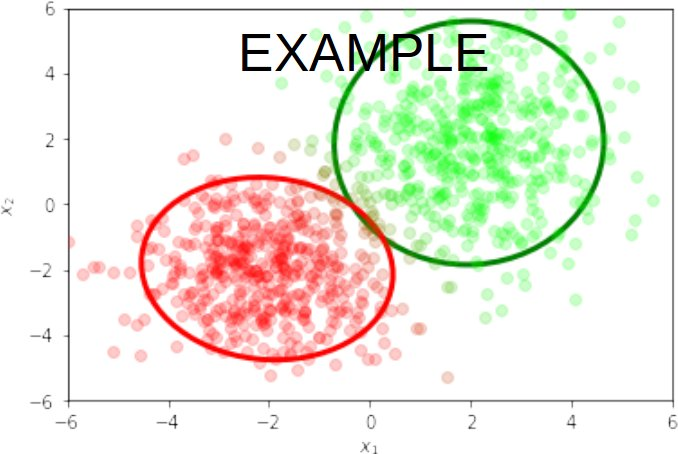

In [21]:
display(Image(filename='./gmm.jpg'))

# Clustering of digits data using GMM

For the next problem you will use GMM (scikit-learn version) to cluster the digits data in the scikit-learn library. 

## Load the digit datasets

The datasets are loaded into a dictionary.

In [22]:
# Import `datasets` from `sklearn`
from sklearn import datasets

# Load in the `digits` data
digits = datasets.load_digits()
print(digits.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [23]:
# Find the number of unique labels
number_digits = len(np.unique(digits.target))

print (number_digits)

10


## Inspect the different digit  images

In [24]:
import matplotlib.cm as cm # helps you work with grayscale images

In [25]:
def show_digits(k=0):
    """
    Show the digits in the training set
    """
    
    plt.imshow(digits.images[k], cmap=cm.binary)   
    
    plt.show()
    
w_show_digits = interact(show_digits, k =(0, 1796)) 


interactive(children=(IntSlider(value=0, description='k', max=1796), Output()), _dom_classes=('widget-interact…


**Next, fit the data to a 10 component GMM model, using the scikit-learn package.**

**Once you have built the GMM model, extract the means as well as the covariances of the 10 GMM components. Display the means to get something like the  image below.**

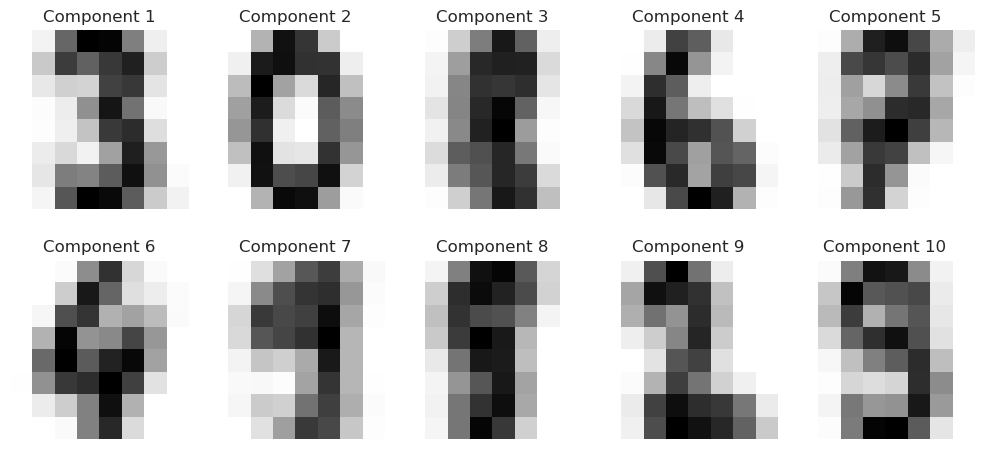

In [44]:
data = digits.data
#print(data.shape) #(1797, 64)
np.random.seed(1)
# Insert GMM code
from sklearn.mixture import GaussianMixture

# Fit the data to a 10-component GMM model
gmm = GaussianMixture(n_components=10, random_state=1)
gmm.fit(data)

# Extract the means and covariances of the 10 GMM components
means = gmm.means_
covariances = gmm.covariances_

# Display the means
# print("Means of the 10 GMM components:")
# plt.imshow(means, cmap=cm.binary)   
# plt.show()
# Plot each mean as a separate image
fig, axs = plt.subplots(2, 5, figsize=(10, 5))
axs = axs.flatten()

for i in range(10):
    axs[i].imshow(means[i].reshape(8, 8), cmap=cm.binary)
    axs[i].set_title(f'Component {i+1}')
    axs[i].axis('off')

plt.tight_layout()
plt.show()

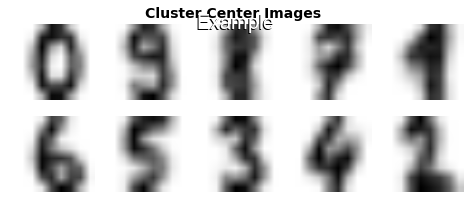

In [27]:
display(Image(filename='./wm_GMM.png'))

## Generate samples

**Use the means and covariances of the different components and draw a sample from each component. Display the samples in an image.**

*Hint*: Read the documentation of scipy.stats.multivariate_normal

**Now can you try out the color quantization and digit analyses with your newly created implementations of k-means and GMM respectively and see if you get the same outputs.**

In [14]:
# Generating a random startpoint, two cluster center points - Choose two random samples
import numpy as np
import pylab as plt
start_X_ind = np.random.randint(low=0, high=X.shape[1], size = 2)
Mean = X[:,start_X_ind]

#Overwriting random choice to make it look more impressive
Mean[0,0] = -5
Mean[1,0] = -5

Mean[0,1] = -4
Mean[1,1] = -4

#Class labels
label_ass = np.zeros(y.shape,dtype=int) 

#Perform 5 iterations of K-means
for counter in range(5):
    #Calculate Distances to two cluster points
    d1 = np.sqrt((X[0,:] - Mean[0,0])**2 + (X[1,:] - Mean[1,0])**2)
    d2 = np.sqrt((X[0,:] - Mean[0,1])**2 + (X[1,:] - Mean[1,1])**2)
    
    #Assign a label to each observation depending to which cluster center it is the closest to
    label_ass[d1>=d2] = 1
    label_ass[d2>d1] = 0
    
    Mean_old = np.copy(Mean)
    
    #Calculate new cluster points; mean of all points belonging to the same cluster
    Mean[0,0] = np.mean(X[0,label_ass==0])
    Mean[1,0] = np.mean(X[1,label_ass==0])
    
    Mean[0,1] = np.mean(X[0,label_ass==1])
    Mean[1,1] = np.mean(X[1,label_ass==1])
        
    
    #Plot result
    print("Counter = ",counter)
    if counter%1 == 0:
       for k in range(X.shape[1]):
           plt.plot(X[0,k],X[1,k],c[label_ass[k]]+"o")
            
       #Square old center star new center     
       plt.plot(Mean[0,0],Mean[1,0],"b"+"*",ms=16)
       plt.plot(Mean[0,1],Mean[1,1],"c"+"*",ms=16)
        
       plt.plot(Mean_old[0,0],Mean_old[1,0],"b"+"s",ms=10)
       plt.plot(Mean_old[0,1],Mean_old[1,1],"c"+"s",ms=10)
        
        
    plt.show()
    

  

NameError: name 'y' is not defined

In [15]:
import numpy as np
import pylab as plt
def eval_2d_gauss(x,y,u_x,u_y,s_x,s_y):
    answ = 1.0/(2*np.pi*s_x*s_y)*np.exp(-0.5*(((x-u_x)/s_x)**2+((y-u_y)/s_y)**2))
    return answ

def gamma(x,p,u,s):
    #x[sample,x or y]
    #u[density num,x or y]
    #u[density num,x or y]
    gamma_var = np.zeros(x.shape,dtype=float)
    #gamma[sample,density]
    #p[density]
    
    for k in range(x.shape[0]):
        d0 = eval_2d_gauss(x[k,0],x[k,1],u[0,0],u[0,1],s[0,0],s[0,1])
        d1 = eval_2d_gauss(x[k,0],x[k,1],u[1,0],u[1,1],s[1,0],s[1,1])
        
        gamma_var[k,0] = (p[0]*d0)/(p[0]*d0 + p[1]*d1)
        gamma_var[k,1] = (p[1]*d1)/(p[0]*d0 + p[1]*d1)
        
    return gamma_var

def mean(x,gamma_var):
    N0 = np.sum(gamma_var[:,0])
    N1 = np.sum(gamma_var[:,1])
    
    u = np.zeros((2,2),dtype=float) #u[density num,x or y]
    p = np.zeros((2,),dtype=float) #p[density num]
    
    u[0,0] = (1.0/N0) * np.sum(gamma_var[:,0]*x[:,0])
    u[0,1] = (1.0/N0) * np.sum(gamma_var[:,0]*x[:,1])
    
    u[1,0] = (1.0/N1) * np.sum(gamma_var[:,1]*x[:,0])
    u[1,1] = (1.0/N1) * np.sum(gamma_var[:,1]*x[:,1])
    
    p[0] = N0/x.shape[0]
    p[1] = N1/x.shape[0]
   
    return u,p
    
def sigma(x,gamma_var,u):
    N0 = np.sum(gamma_var[:,0])
    N1 = np.sum(gamma_var[:,1])
        
    s = np.zeros((2,2),dtype=float) #s[density num,x or y]
    
    s[0,0] = np.sqrt((1.0/N0) * np.sum(gamma_var[:,0]*(x[:,0]-u[0,0])**2))
    s[0,1] = np.sqrt((1.0/N0) * np.sum(gamma_var[:,0]*(x[:,1]-u[0,1])**2))
    
    s[1,0] = np.sqrt((1.0/N1) * np.sum(gamma_var[:,1]*(x[:,0]-u[1,0])**2))
    s[1,1] = np.sqrt((1.0/N1) * np.sum(gamma_var[:,1]*(x[:,1]-u[1,1])**2))
    
    return s

In [16]:
def gmm(x,p_i,u_i,s_i,itra):
    
    #initialize parameters
    
    p = np.copy(p_i)
    u = np.copy(u_i)
    s = np.copy(s_i)
    
    for k in range(itra):
        
        gamma_var = gamma(x,p,u,s) #E step
        
                
        u,p = mean(x,gamma_var)#M step
        s = sigma(x,gamma_var,u)
        
        #no convergence checking, simplistic toy example
        
        # plotting only
        if k%1 == 0:
            ax = plt.gca()
            circ1 = plt.Circle((u[0,0],u[0,1]),s[0,0],edgecolor='green',facecolor='white',fill=True,linewidth=3,zorder=1)
            circ2 = plt.Circle((u[1,0],u[1,1]),s[1,0],edgecolor='red',facecolor='white',fill=True,linewidth=3,zorder=2)
            ax.add_artist(circ1)
            ax.add_artist(circ2)
            for i in range(x.shape[0]):
                col = [[gamma_var[i,1],gamma_var[i,0],0]]
                ax.scatter(x[i,0],x[i,1],c=col,zorder=3,alpha=0.2)
                
            ax.set_xlabel("$x_1$")
            ax.set_ylabel("$x_2$")
            ax.set_title("Iteration : "+str(k))
            plt.show()


In [17]:
ej = 0.4*4
print(ej)

1.6


In [18]:
print((1.6+9*0.6),15*0.6,25*0.6)

7.0 9.0 15.0


In [19]:
sm= 8+10+13+34
print(sm/4)

16.25


In [20]:
sm = 1+3+8
print(sm/3)

4.0


In [21]:
m=(1.9-7.2)/(2.5-5)
print(m)

2.12


In [22]:
print(-1/m)

-0.4716981132075471


In [23]:
#e1 = 8.7 e2=9.2 u1=176 u2=167 pi1=0.63 jacdbei
X = np.array([[0.70849269, -0.61451051, -4.13847659, -3.58846251],[-0.81884773, 0.34072422, 0.37639262, 0.10408057]])
print(X)
p = np.array([0.3,0.7])
u = np.array([1.2,0.4],[-4.4,1.0])
s = np.array([[0.8,-0.4],[-0.4,1.0],[1.2,-0.8],[-0.8,1.0]])
GMMS = gmm(X,p,u,s,1)

[[ 0.70849269 -0.61451051 -4.13847659 -3.58846251]
 [-0.81884773  0.34072422  0.37639262  0.10408057]]


TypeError: Field elements must be 2- or 3-tuples, got '-4.4'